This project trains a neural network model to classify images of clothing, like sneakers and shirts. This project uses tf.keras build and train models in TensorFlow.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


Import the Fashion MNIST dataset. 
60,000 images are used to train the network and 10,000 images to evaluate how accurately the network learned to classify images.

In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
test_images.shape

(10000, 28, 28)

In [10]:
len(test_labels)

10000

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:



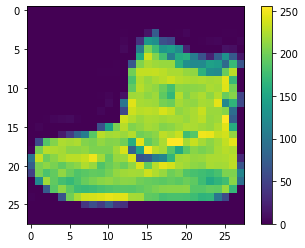

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:



In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

The first 30 images from the training set and class name below each image

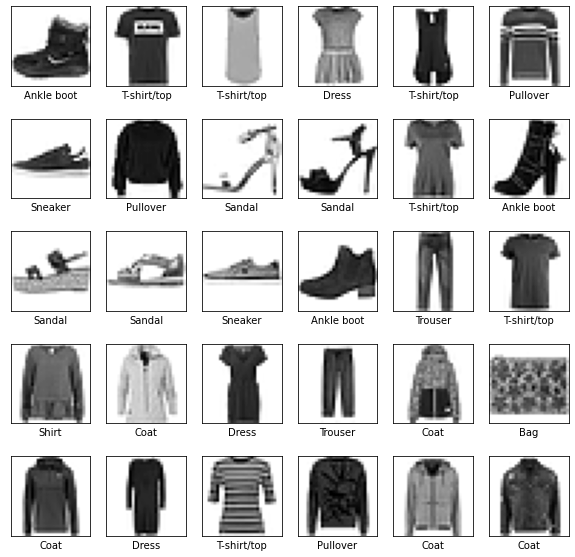

In [33]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Build the model**


---
Building the neural network requires configuring the layers of the model, then compiling the model.
---
The basic building block of a neural network is the layer. Layers extract representations from the data fed into them.

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

**Compile the model**
---


*   *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
*   *Optimizer* —This is how the model is updated based on the data it sees and its loss function. Adadelta, adagrad, adam, adamax, ftrl, nadam, etc.
*   *Metrics* —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.


In [35]:
model.compile(optimizer='adamax',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Train the model**

In [36]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2009 - accuracy: 0.9244
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1952 - accuracy: 0.9269
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1918 - accuracy: 0.9280
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1883 - accuracy: 0.9296
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1866 - accuracy: 0.9306
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1830 - accuracy: 0.9317
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1811 - accuracy: 0.9323
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1786 - accuracy: 0.9337
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1757 - accuracy: 0.9343
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.174

Evaluate accuracy:

In [37]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3167 - accuracy: 0.8899

Test accuracy: 0.8899000287055969


Make predictions:

In [38]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [39]:
predictions = probability_model.predict(test_images)

In [40]:
predictions[0]

array([8.5973060e-09, 3.4686570e-11, 9.9627917e-11, 1.8919342e-09,
       1.6727529e-09, 6.1038154e-05, 2.7558684e-09, 2.9779368e-03,
       4.8278057e-09, 9.9696094e-01], dtype=float32)

In [41]:
np.argmax(predictions[0])

9

In [42]:
test_labels[0]

9

In [43]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Verify predictions

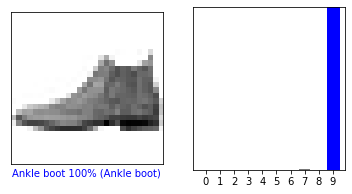

In [44]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

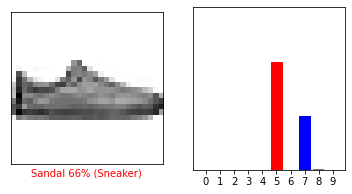

In [45]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

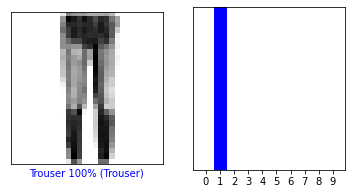

In [46]:
i = 3
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

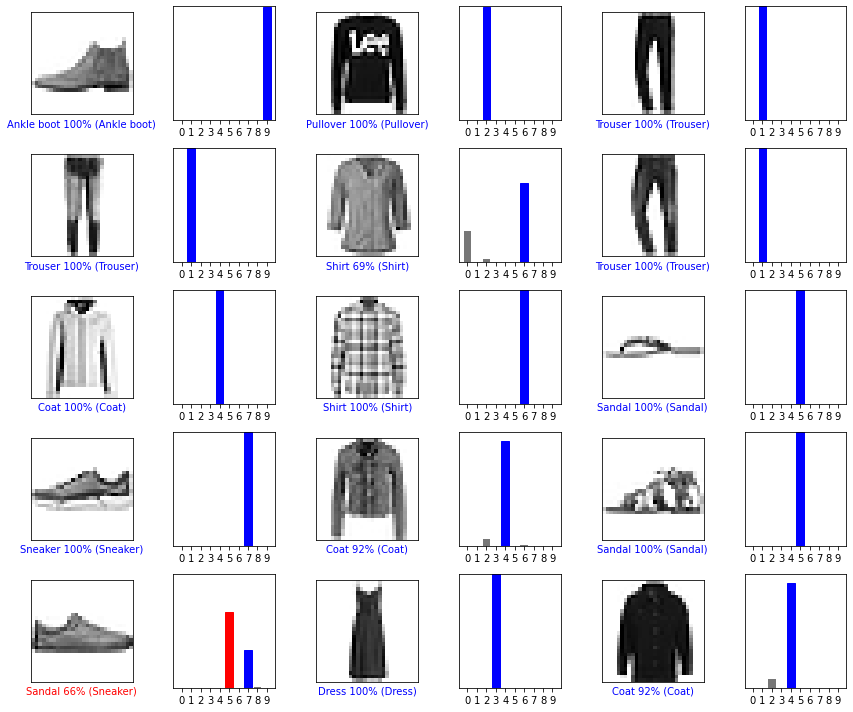

In [47]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

Use the trained model to make a prediction about a single image.

In [49]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [50]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [51]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[4.4119712e-08 9.9999833e-01 3.5883613e-10 1.6837249e-06 1.2472102e-08
  1.1055344e-15 1.4096634e-09 3.3954239e-17 1.5717998e-11 1.3734645e-13]]


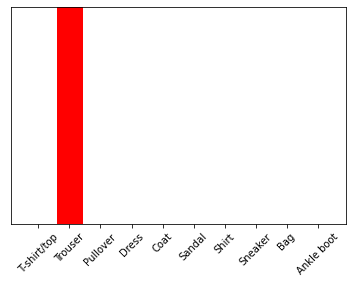

In [52]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [53]:
np.argmax(predictions_single[0])

1

In [54]:
# Grab an image from the test dataset.
img = test_images[3]

print(img.shape)

(28, 28)


In [55]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [56]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[4.4119712e-08 9.9999833e-01 3.5883613e-10 1.6837249e-06 1.2472102e-08
  1.1055344e-15 1.4096634e-09 3.3954239e-17 1.5717998e-11 1.3734645e-13]]


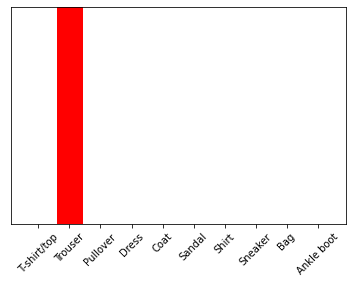

In [57]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [58]:
np.argmax(predictions_single[0])

1